In [1]:
import streamlit as st
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from image_processing import *
import tensorflow as tf

# import tensorflow as tf
from tensorflow import keras

img = cv.imread("digitos.jpg")

img_gray = cv.cvtColor(img.copy(), cv.COLOR_BGR2GRAY)

model = keras.models.load_model(
    "/mnt/c/Users/diego/Desktop/projeto pdi_machine_learning/projeto-pdi_machine_learning/app/model"
)

2022-07-20 13:13:11.156576: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-20 13:13:11.724411: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /mnt/c/Users/diego/Desktop/projeto pdi_machine_learning/projeto-pdi_machine_learning/.venv/lib/python3.10/site-packages/cv2/../../lib64:
2022-07-20 13:13:11.724429: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-20 13:13:48.982695: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/nu

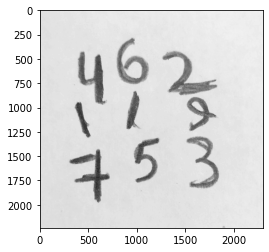

In [4]:
plt.imshow(img_gray,cmap='gray')

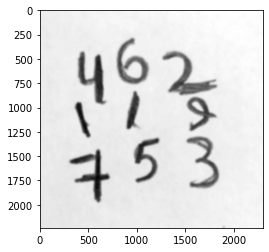

In [2]:
blur_img = blur_image(
    img_gray, mask_size=51
)



plt.imshow(blur_img,cmap='gray')

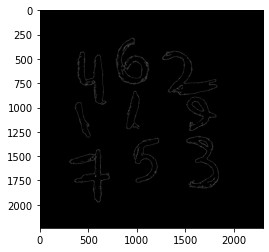

In [3]:
multiplier = 2
aperture = 5
canny = edges_canny(
    blur_img,
    lower_threshold=100,
    multiplier=multiplier,
    aperture_size=aperture,
)
plt.imshow(canny,cmap='gray')

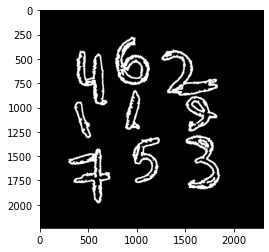

In [5]:
kernel_size = 7
interation = 2
dilate_img = dilate_image(
    canny, kernel_size=kernel_size, iterations=interation
)
plt.imshow(dilate_img,cmap='gray')

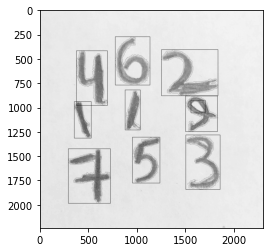

In [6]:
contours_poly, boundRect, contours = find_contours_and_boxes(
    dilate_img
)

boxes_img = draw_bounding_boxes_contours(
    img_gray.copy(), contours_poly, boundRect, contours
)
plt.imshow(boxes_img,cmap='gray')

290

947

1494

351

1547

1492

872

373

1245

771



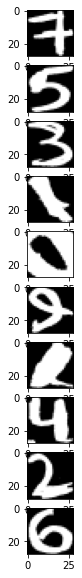

In [7]:
rois = extract_roi_black_white(
    img_gray.copy(), boundRect,threshold=160
)

resize = resize_rois(rois)
cont = 0
plt.figure(figsize=(20,10))
for r in resize:
    plt.subplot(10,1,cont+1)
    plt.imshow(r,cmap='gray')
    cont = cont+1

plt.show()

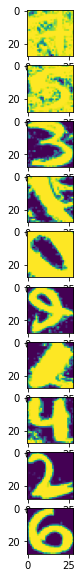

In [18]:
#        try:
resize2 = np.float_(resize) / 255
cont = 0
plt.figure(figsize=(20,10))
for r in resize2:
    plt.subplot(10,1,cont+1)
    plt.imshow(r)
    cont = cont+1

plt.show()

In [10]:
imgs=np.array([i for i in resize2])

In [11]:
imgs.shape

(28, 28)

In [ ]:
model.predict(imgs)